# VAE_2D_Example

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch import nn, optim
from torch.autograd import Variable

## Prepare Data

Text(0,0.5,'y1')

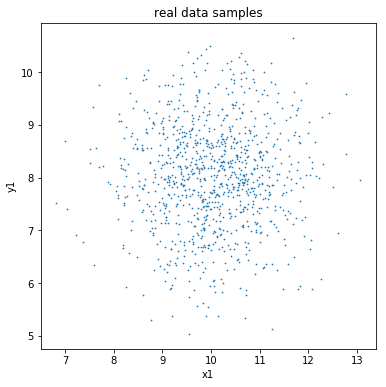

In [12]:
def sample_real(batch_size=100):
    x = torch.randn(batch_size, 2)   # x ~ N(mu=0,std=1)
    x[:,0] += 10
    x[:,1] += 8
    return x

plt.figure(figsize=[6,6])
x = sample_real(1000).numpy()
plt.scatter(x[:,0],x[:,1],0.5)
plt.title('real data samples')
plt.xlabel('x1')
plt.ylabel('y1')

## Define VAE model

In [15]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        # Build two layer net
        self.linear1 = nn.Sequential(nn.Linear(2,8),nn.ELU())
        self.linear_mu = nn.Linear(8,8)
        self.linear_std = nn.Linear(8,8)
        self._init_parameters()
        
    def forward(self, input):
        output = self.linear1(input)
        mu = self.linear_mu(output)
        std = self.linear_std(output)
        eps = Variable(torch.randn(mu.size()))
        z = mu + eps * std     
        return z, mu, std
    
    def _init_parameters(self):
        for p in self.parameters():
            if p.ndimension()>1:
                nn.init.kaiming_normal(p)

In [16]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.linear1 = nn.Sequential(nn.Linear(8,8),nn.ELU())
        self.linear2 = nn.Linear(8,2)
        self._init_parameters()
        
    def forward(self, input):
        output = self.linear1(input)
        output = self.linear2(output)
        return output
    
    def _init_parameters(self):
        for p in self.parameters():
            if p.ndimension()>1:
                nn.init.kaiming_normal(p)

## Loss function
$E_{z~Q}[log_P{X|z}] + D_{KL}[{Q(z|x)}||{P(z)}]$.

- loss = reconstruction_loss + latent_loss

- reconstruction_loss = X_generated should equal X => MSE, Regression, or whatever
- latent_loss = drive $\mu$ and $\Sigma$ toward an Isotropic Gaussian => $\mu^2 +  tr \Sigma$

## Training VAE Model

In [9]:
# a helper function to plot results
def plot_decoder():
    plt.figure(figsize=[5,5])

    z = Variable(torch.randn(200,8))
    x_gen = decoder(z).data.numpy()
    plt.scatter(x_gen[:,0],x_gen[:,1],0.8)
    
    x_real = sample_real(200).numpy()
    plt.scatter(x_real[:,0],x_real[:,1],0.8)
    plt.legend(['VAE','Real Data'])
    
    plt.xlim([-1,11])
    plt.ylim([-1,11])
    return x_gen.mean(0), x_gen.std(0)

epoch=0, loss=110.81863403320312


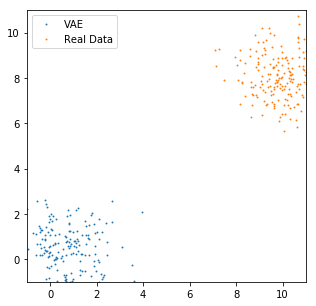

mean=[ 0.80025655  0.18343185], std=[ 0.99166822  1.30389917]
epoch=1000, loss=20.215700149536133
epoch=2000, loss=11.0695219039917
epoch=3000, loss=7.0431694984436035
epoch=4000, loss=4.8087544441223145
epoch=5000, loss=3.540497303009033
epoch=6000, loss=2.784266471862793
epoch=7000, loss=1.9892339706420898
epoch=8000, loss=1.9092845916748047
epoch=9000, loss=1.5937764644622803
epoch=10000, loss=1.4578468799591064


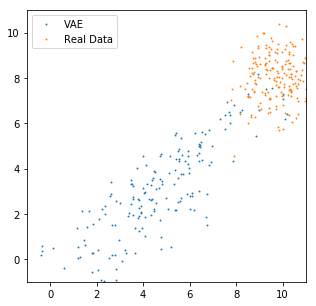

mean=[ 4.3016448   2.46236515], std=[ 2.61751723  2.74171567]
epoch=11000, loss=1.1790121793746948
epoch=12000, loss=1.0478465557098389
epoch=13000, loss=0.9572216272354126
epoch=14000, loss=0.9497838616371155
epoch=15000, loss=0.8478278517723083
epoch=16000, loss=0.8176379799842834
epoch=17000, loss=0.7328778505325317
epoch=18000, loss=0.6777260899543762
epoch=19000, loss=0.6368860006332397
epoch=20000, loss=0.6317899227142334


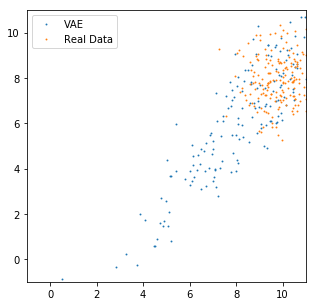

mean=[ 8.71226025  6.60578346], std=[ 2.58056831  2.96365094]
epoch=21000, loss=0.5941581726074219
epoch=22000, loss=0.5889192819595337
epoch=23000, loss=0.6197267770767212
epoch=24000, loss=0.5671219825744629
epoch=25000, loss=0.5907284021377563
epoch=26000, loss=0.5465623736381531
epoch=27000, loss=0.5177521705627441
epoch=28000, loss=0.5163328647613525
epoch=29000, loss=0.4885716438293457
epoch=30000, loss=0.47652655839920044


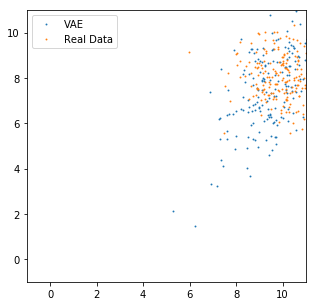

mean=[ 9.65206623  7.65574789], std=[ 1.29651356  1.78773546]
epoch=31000, loss=0.45274728536605835
epoch=32000, loss=0.4800686836242676
epoch=33000, loss=0.4523935317993164
epoch=34000, loss=0.4359922409057617
epoch=35000, loss=0.4197121262550354
epoch=36000, loss=0.4427894353866577
epoch=37000, loss=0.4240850508213043
epoch=38000, loss=0.43712300062179565
epoch=39000, loss=0.4138936996459961
epoch=40000, loss=0.41125285625457764


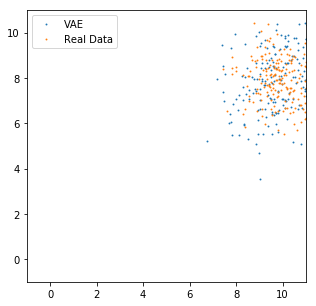

mean=[ 9.85968781  7.89888716], std=[ 1.19760156  1.37689948]
epoch=41000, loss=0.3940751850605011
epoch=42000, loss=0.3910299241542816
epoch=43000, loss=0.406050443649292
epoch=44000, loss=0.39285266399383545
epoch=45000, loss=0.4019854962825775
epoch=46000, loss=0.3965568542480469
epoch=47000, loss=0.391184538602829
epoch=48000, loss=0.37346869707107544
epoch=49000, loss=0.4131089448928833
epoch=50000, loss=0.3823065161705017


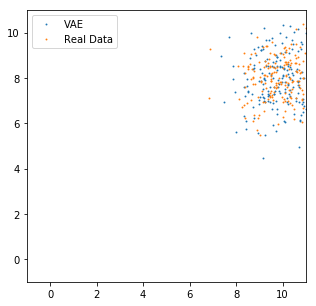

mean=[ 9.95217991  8.01482296], std=[ 1.02575791  1.15748608]
epoch=51000, loss=0.4001901149749756
epoch=52000, loss=0.4098982810974121
epoch=53000, loss=0.39417651295661926
epoch=54000, loss=0.3948725759983063
epoch=55000, loss=0.392117977142334
epoch=56000, loss=0.37893298268318176
epoch=57000, loss=0.3700328767299652
epoch=58000, loss=0.385010302066803
epoch=59000, loss=0.38918113708496094
epoch=60000, loss=0.36683541536331177


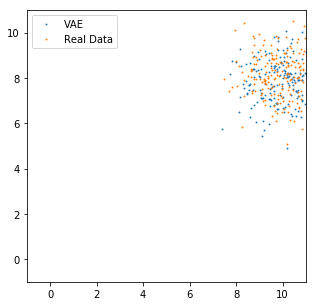

mean=[ 10.03610134   7.85932255], std=[ 1.00630581  0.97234643]
epoch=61000, loss=0.413583368062973
epoch=62000, loss=0.38465946912765503
epoch=63000, loss=0.3927929699420929
epoch=64000, loss=0.4004179835319519
epoch=65000, loss=0.37357985973358154
epoch=66000, loss=0.4057508707046509
epoch=67000, loss=0.3860349655151367
epoch=68000, loss=0.3971529006958008
epoch=69000, loss=0.3812454640865326
epoch=70000, loss=0.4003812372684479


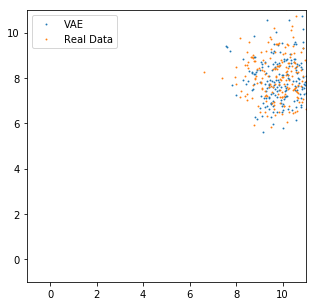

mean=[ 10.03220367   7.91897297], std=[ 0.96517348  0.96184081]
epoch=71000, loss=0.39599940180778503
epoch=72000, loss=0.38568592071533203
epoch=73000, loss=0.3820428252220154
epoch=74000, loss=0.41129201650619507
epoch=75000, loss=0.38140669465065
epoch=76000, loss=0.38728266954421997
epoch=77000, loss=0.37028005719184875
epoch=78000, loss=0.38830316066741943
epoch=79000, loss=0.40839070081710815
epoch=80000, loss=0.36600419878959656


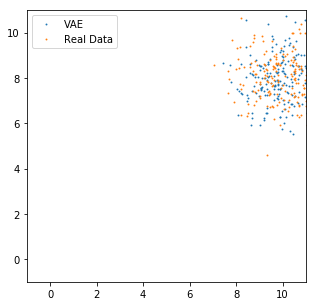

mean=[ 9.91678524  7.97147989], std=[ 0.92955863  0.99964458]
epoch=81000, loss=0.39777183532714844
epoch=82000, loss=0.40219205617904663
epoch=83000, loss=0.401760995388031
epoch=84000, loss=0.3791327476501465
epoch=85000, loss=0.3689669966697693
epoch=86000, loss=0.37513136863708496
epoch=87000, loss=0.37574589252471924
epoch=88000, loss=0.3935912847518921
epoch=89000, loss=0.3951859772205353
epoch=90000, loss=0.4090668559074402


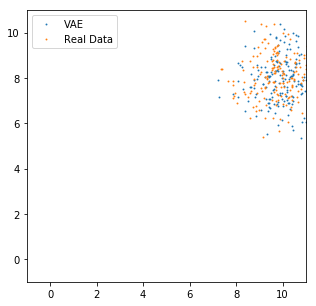

mean=[ 10.05664444   7.94043446], std=[ 0.91803908  0.9861936 ]
epoch=91000, loss=0.3862968683242798
epoch=92000, loss=0.36699411273002625
epoch=93000, loss=0.38670939207077026
epoch=94000, loss=0.388418972492218
epoch=95000, loss=0.3881841003894806
epoch=96000, loss=0.3918919563293457
epoch=97000, loss=0.3611757159233093
epoch=98000, loss=0.37681978940963745
epoch=99000, loss=0.39643290638923645
epoch=100000, loss=0.3912316560745239


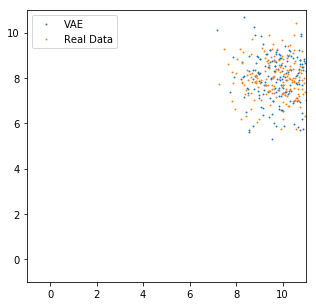

mean=[ 10.00270176   8.0054369 ], std=[ 1.02934837  1.03207934]


In [18]:
from itertools import chain
learning_rate = 0.0001
max_epoch = 100001
batch_size = 200

encoder = Encoder()
decoder = Decoder()
parameters = chain(encoder.parameters(), decoder.parameters())
optimizer = optim.Adam(parameters, lr=learning_rate)

for epoch in range(max_epoch):
    optimizer.zero_grad()
    
    x = Variable(sample_real(batch_size))
    z, mu, std = encoder(x)
    x_gen = decoder(z)
    
    loss_reconstruction = torch.mean((x_gen-x)**2)
    D_kl = 0.5*torch.mean(mu**2 + std**2 - 1 - 2*torch.log(1e-10+torch.abs(std)))
    loss = loss_reconstruction + D_kl
    
    loss.backward()
    optimizer.step()
    
    if epoch%1000==0:
        print('epoch={}, loss={}'.format(epoch,loss.data.numpy()[0]))
    if epoch%10000==0:
        mean, std = plot_decoder()
        plt.show()
        print('mean={}, std={}'.format(mean, std))
